In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from arch.unitroot import ADF
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from statsmodels.tsa.api import VAR

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [3]:
# Download datasets
m6_data = pd.read_csv("M5. goog_eur_10.csv")

# Convert date variable to date format and set index
m6_data["Date2"] = pd.to_datetime(m6_data["Date"], format="%m/%d/%Y")
data_set = m6_data.loc[:,].set_index("Date2")

# Selecting GOOGLE, EURUSD, UST10Y
goog = data_set.GOOGLE
eur = data_set.EURUSD
ust10 = data_set.UST10Y

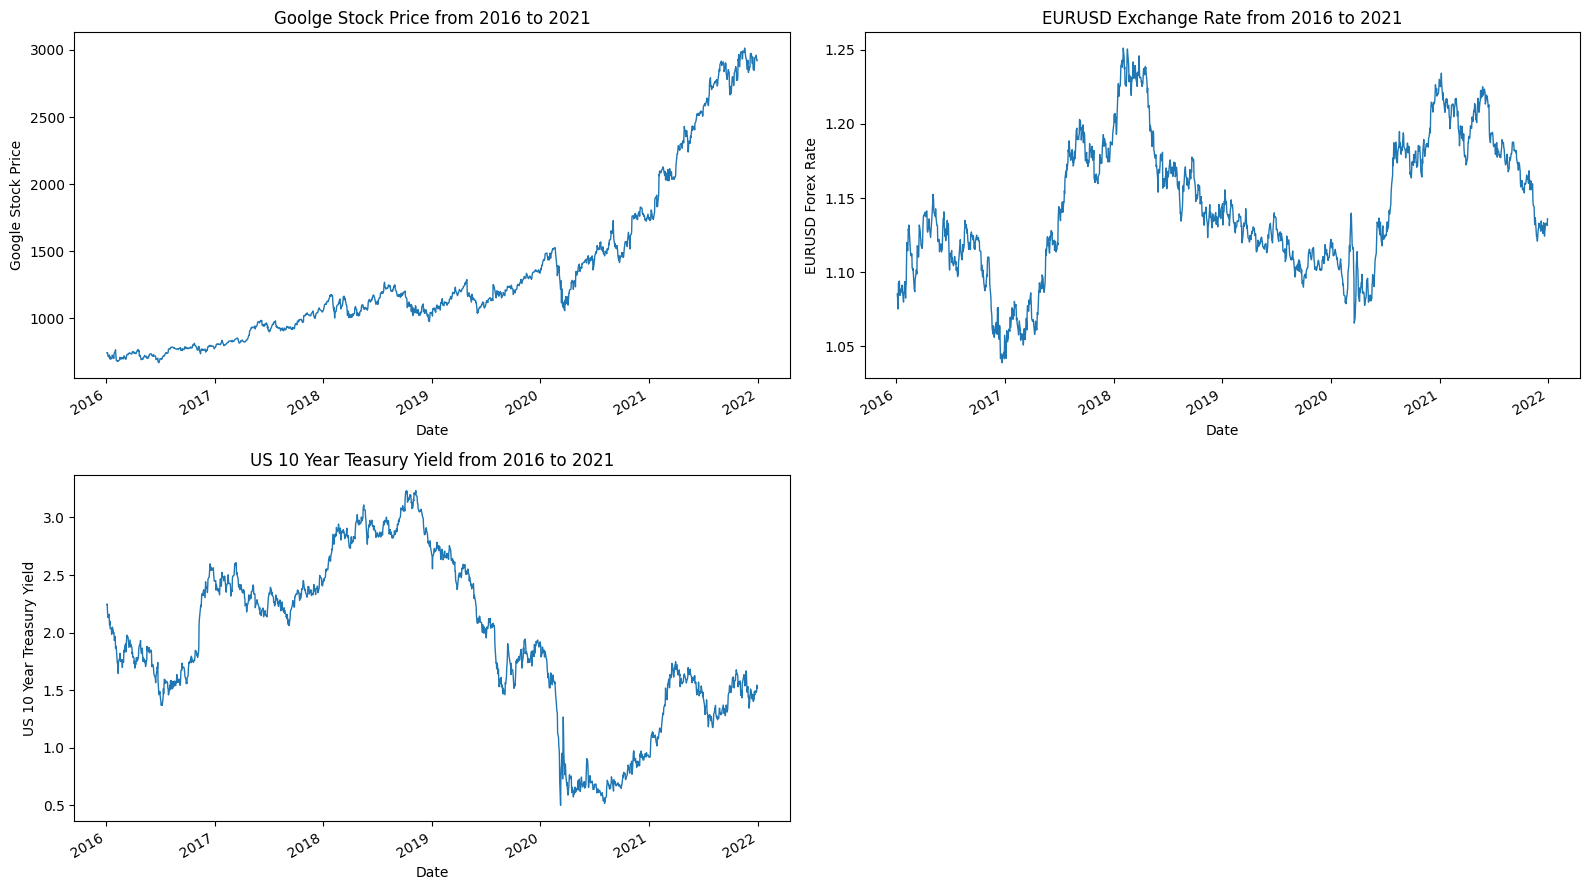

In [4]:
# Time plots for Google Stock Price, EUR/USD Forex Rate and U.S. 10-Year Treasury Yield
fig, axs = plt.subplots(2, 2)

goog.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="Google Stock Price",
    title="Goolge Stock Price from 2016 to 2021",
    ax=axs[0, 0],
)

eur.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="EURUSD Forex Rate",
    title="EURUSD Exchange Rate from 2016 to 2021",
    ax=axs[0, 1],
)

ust10.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="US 10 Year Treasury Yield",
    title="US 10 Year Teasury Yield from 2016 to 2021",
    ax=axs[1, 0],
)

axs[1, 1].axis("off")
fig.tight_layout()
plt.show()

In [5]:
# ADF Test Results with 5% Significance Level for GOOGLE, EURUSD, UST10Y
goog_adf = ADF(goog, trend="n", method="bic")
eur_adf = ADF(eur, trend="n", method="bic")
ust10_adf = ADF(ust10, trend="n", method="bic")

pd.DataFrame(
    {
        "Google Stock Price": (goog_adf.stat, goog_adf.critical_values["5%"]),
        "| EURUSD Forex Rate": (eur_adf.stat, eur_adf.critical_values["5%"]),
        "| US 10 Year Treasury Yield": (
            ust10_adf.stat,
            ust10_adf.critical_values["5%"],
        ),
    },
    index=["ADF Test Statistic", "5% Critical Value"],
)

,Google Stock Price,| EURUSD Forex Rate,| US 10 Year Treasury Yield
ADF Test Statistic,3.04790,0.164388,-0.810331
5% Critical Value,-1.94118,-1.941180,-1.941180


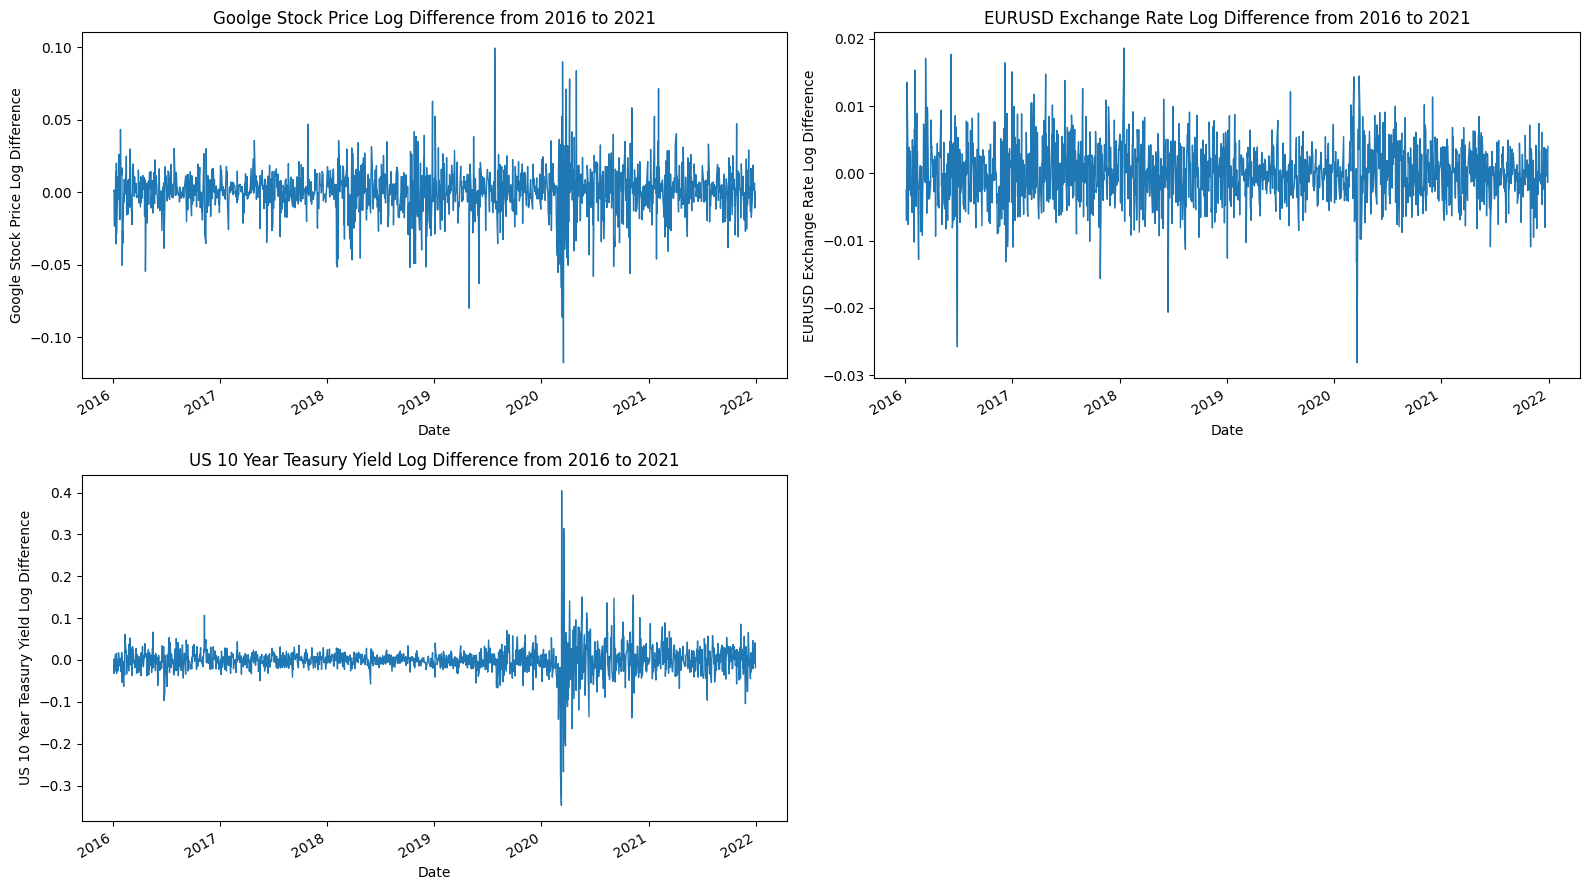

In [6]:
# Time Plots for Differenced GOOGLE, EURUSD, UST10Y
fig, axs = plt.subplots(2, 2)

lgoog = np.log(goog).diff().dropna()
lgoog.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="Google Stock Price Log Difference",
    title="Goolge Stock Price Log Difference from 2016 to 2021",
    ax=axs[0, 0],
)

leur = np.log(eur).diff().dropna()
leur.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="EURUSD Exchange Rate Log Difference",
    title="EURUSD Exchange Rate Log Difference from 2016 to 2021",
    ax=axs[0, 1],
)

lust10 = np.log(ust10).diff().dropna()
lust10.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="US 10 Year Teasury Yield Log Difference",
    title="US 10 Year Teasury Yield Log Difference from 2016 to 2021",
    ax=axs[1, 0],
)

axs[1, 1].axis("off")
fig.tight_layout()
plt.show()

In [7]:
# ADF Test Results with 5% Significance Level for GOOGLE, EURUSD, UST10Y
lgoog_adf = ADF(lgoog, trend="n", method="bic")
leur_adf = ADF(leur, trend="n", method="bic")
lust10_adf = ADF(lust10, trend="n", method="bic")

pd.DataFrame(
    {
        "Differenced Google Stock Price": (lgoog_adf.stat, lgoog_adf.critical_values["5%"]),
        "| Differenced EURUSD Forex Rate": (leur_adf.stat, leur_adf.critical_values["5%"]),
        "| Differenced US 10 Year Treasury Yield": (
            lust10_adf.stat,
            lust10_adf.critical_values["5%"],
        ),
    },
    index=["ADF Test Statistic", "5% Critical Value"],
)

,Differenced Google Stock Price,| Differenced EURUSD Forex Rate,| Differenced US 10 Year Treasury Yield
ADF Test Statistic,-43.391403,-39.458187,-16.826455
5% Critical Value,-1.941180,-1.941180,-1.941181


In [8]:
# VAR Model Lag Selection for Differenced GOOGLE, EURUSD, UST10Y

# Join log time series in one DataFrame
diff_data =pd.concat([lgoog, leur, lust10], axis=1)

#Fit Var and run selection
model = VAR(diff_data)
x = model.select_order(maxlags=12, trend='c')
x.summary()

/opt/anaconda3/envs/test_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-25.77,-25.76*,6.404e-12,-25.77
1,-25.80,-25.75,6.260e-12,-25.78*
2,-25.80,-25.72,6.247e-12,-25.77
3,-25.80,-25.70,6.228e-12,-25.76
4,-25.81,-25.67,6.197e-12,-25.76
5,-25.81,-25.64,6.151e-12,-25.75
6,-25.82,-25.62,6.112e-12,-25.75
7,-25.86,-25.63,5.858e-12,-25.78
8,-25.87,-25.60,5.825e-12,-25.77
9,-25.87*,-25.57,5.804e-12*,-25.76


In [9]:
diff_mod = VAR(diff_data)
diff_mod_var = diff_mod.fit(
    # when maxlags=None criterion to use for VAR order selection is
    # ic{'aic', 'fpe', 'hqic', 'bic', None}
    ic=None, #Auto lag selection
    method='OLS',
    trend='c', 
    verbose=True
)
diff_mod_var.summary()

/opt/anaconda3/envs/test_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 17, Jun, 2025
Time:                     19:06:33
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -25.7532
Nobs:                     1503.00    HQIC:                  -25.7799
Log likelihood:           12999.5    FPE:                6.26733e-12
AIC:                     -25.7957    Det(Omega_mle):     6.21756e-12
--------------------------------------------------------------------
Results for equation GOOGLE
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.000992         0.000420            2.362           0.018
L1.GOOGLE        -0.098637         0.026278           -3.754           0.000
L1.EURUSD         0.005368         0.094335            0.057           0.95

In [11]:
lag_order = diff_mod_var.k_ar
print(lag_order)

1


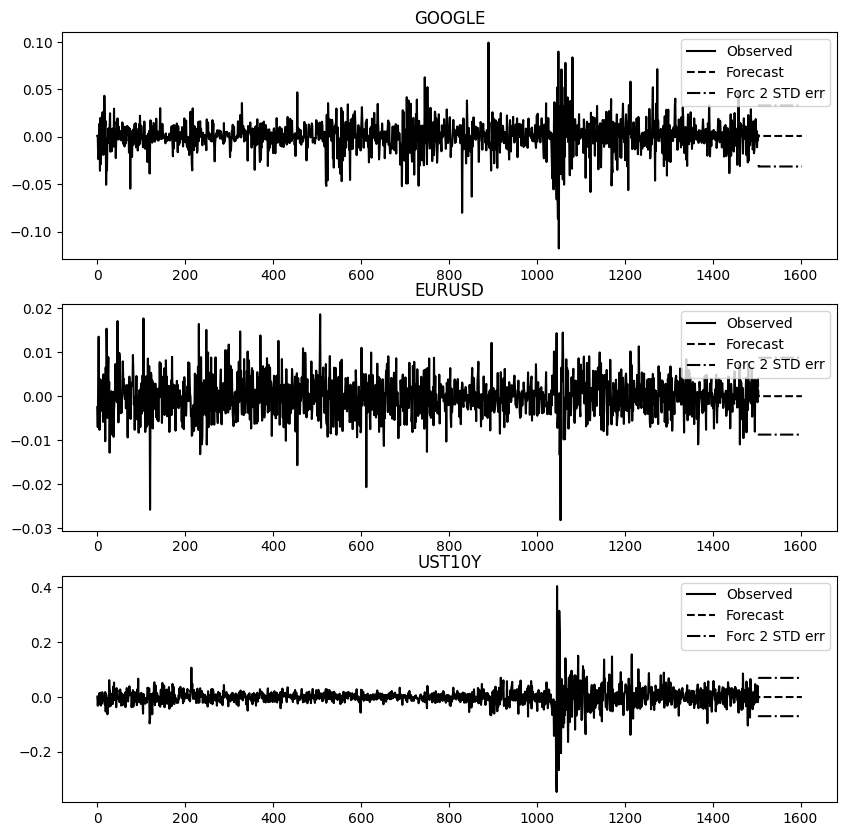

In [12]:
diff_mod_var.plot_forecast(steps=100, alpha=0.05, plot_stderr=True)
plt.show()

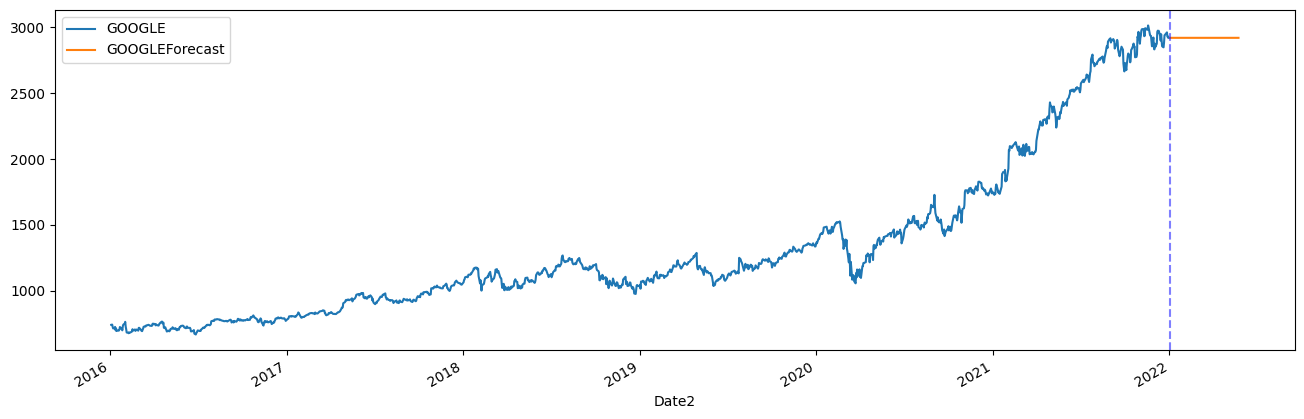

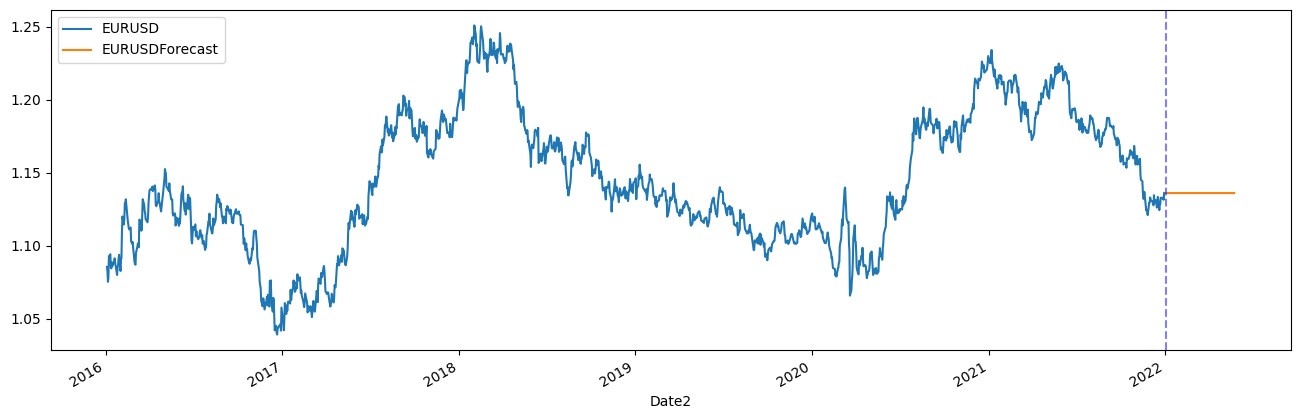

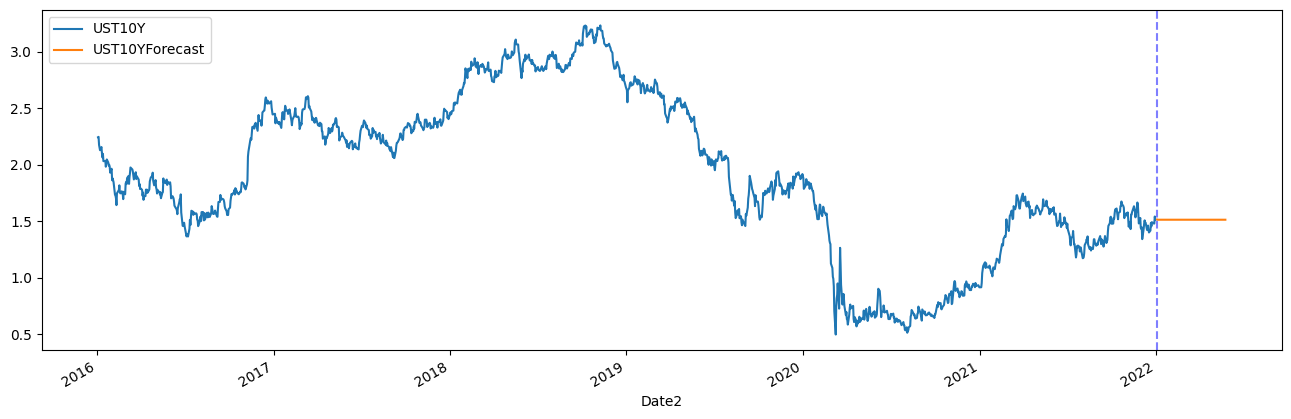

In [14]:
# get 100 step prediction values for differenced data
# drop NA values at start
diff_data_val = diff_data.values[diff_mod_var.k_ar:]
pred=diff_mod_var.forecast(y=diff_data_val, steps=100)
pd.DataFrame(pred)

# extend index with 100 more business dates per USFederalHolidayCalendar
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
idx = pd.date_range('2022-01-03', periods=100, freq=us_bd)
df_forecast= pd.DataFrame(data=pred, index=idx, columns=["GOOGLE1d", "EURUSD1d", "UST10Y1d"])

# recover/re-align lagged predicted values to get forecasts at original dates
df_forecast['GOOGLEForecast']=data_set['GOOGLE'].iloc[-1] + df_forecast['GOOGLE1d']
df_forecast['EURUSDForecast']=data_set['EURUSD'].iloc[-1] + df_forecast['EURUSD1d']
df_forecast['UST10YForecast']=data_set['UST10Y'].iloc[-1] + df_forecast['UST10Y1d']

# plot initial data with forecasted values for each of GOOGLE, EURUSD, UST10Y
data_set['GOOGLE'].plot(figsize=(16,5), legend=True)
df_forecast['GOOGLEForecast'].plot(legend=True)
plt.axvline(x='2022-01-03', alpha=0.5, color='b', linestyle='--')
plt.show()

data_set['EURUSD'].plot(figsize=(16,5), legend=True)
df_forecast['EURUSDForecast'].plot(legend=True)
plt.axvline(x='2022-01-03', alpha=0.5, color='b', linestyle='--')
plt.show()

data_set['UST10Y'].plot(figsize=(16,5), legend=True)
df_forecast['UST10YForecast'].plot(legend=True)
plt.axvline(x='2022-01-03', alpha=0.5, color='b', linestyle='--')
plt.show()

# **LESSON 2**

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
from arch.unitroot import ADF 
from arch.unitroot.cointegration import phillips_ouliaris
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.ardl import UECM

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [81]:
forex = pd.read_csv('M6. forex_1.csv')

forex['Date2']=pd.to_datetime(forex['Date'], format='%m/%d/%Y')
forex = forex.loc[:,['Date2', 'AUDUSD', 'NZDUSD', 'USDCAD']].set_index('Date2')[64:]


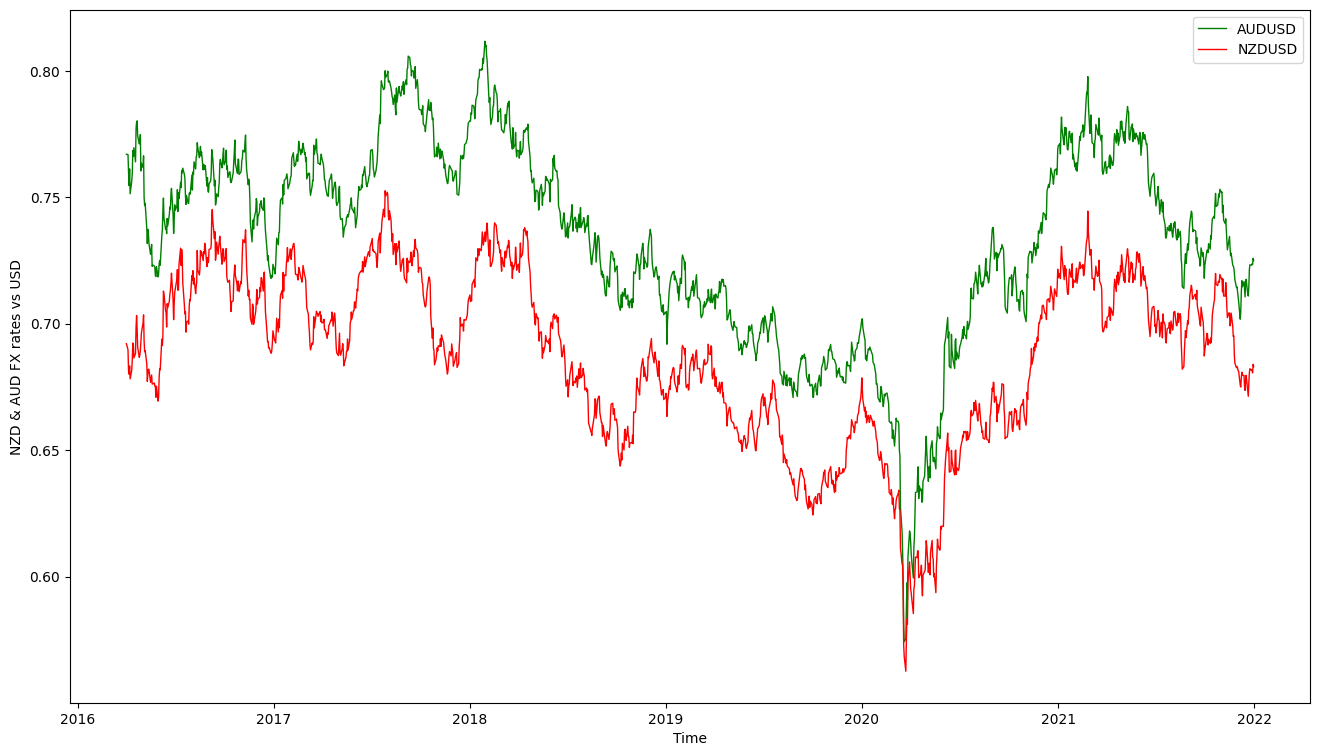

In [14]:
plt.plot(forex.AUDUSD, linewidth=1, color='g', label='AUDUSD')
plt.plot(forex.NZDUSD, linewidth=1, color='r', label='NZDUSD')
plt.xlabel('Time')
plt.ylabel('NZD & AUD FX rates vs USD')
plt.legend()
plt.show()

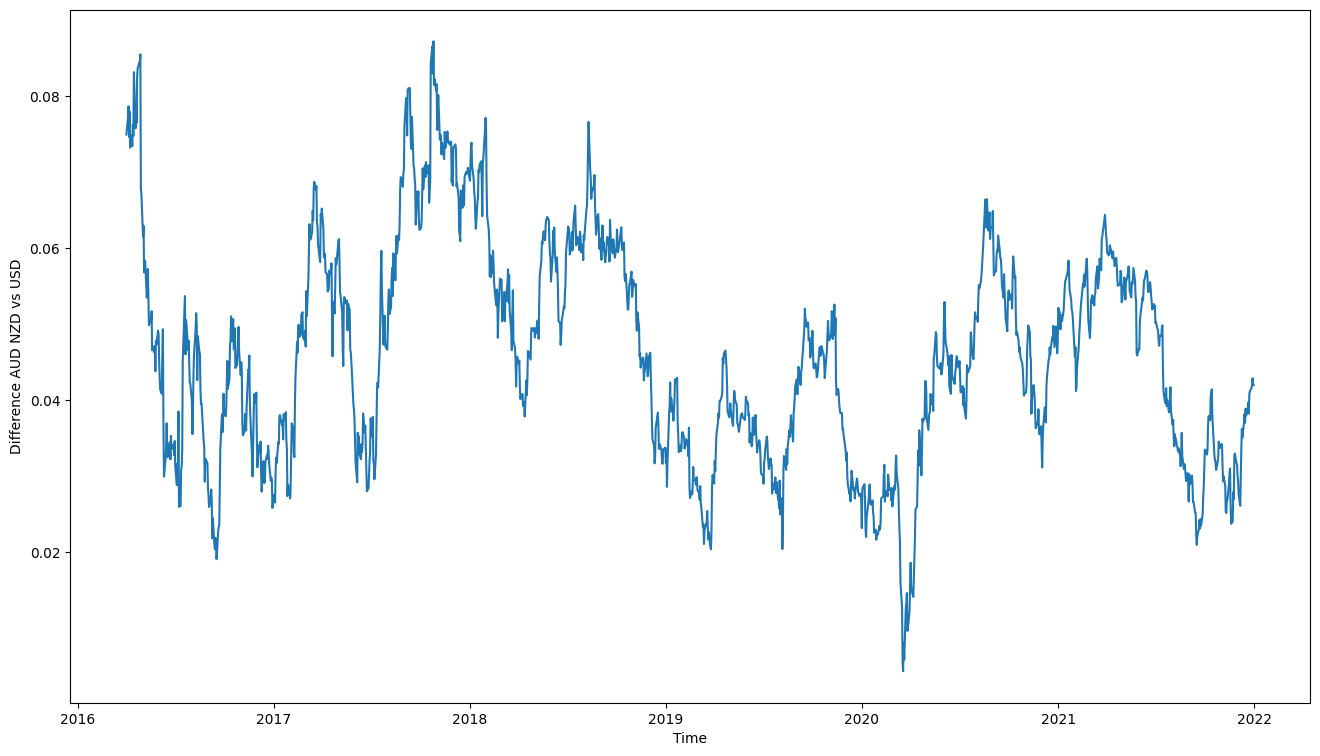

In [15]:
plt.plot(forex.AUDUSD - forex.NZDUSD)
plt.xlabel('Time')
plt.ylabel('Difference AUD NZD vs USD')
plt.show()

In [79]:
from statsmodels.regression.linear_model import GLSAR
import statsmodels.api as sm

In [85]:
model = sm.OLS(forex.NZDUSD, sm.add_constant(forex.AUDUSD)).fit()
model.summary()
autocorr_resid = model.resid

In [86]:
model_gls = GLSAR(forex.NZDUSD, sm.add_constant(forex.AUDUSD), rho=1)
results  = model_gls.iterative_fit(maxiter=10)
results.summary()
resid_correct = results.resid

In [87]:
ac_res_adf = ADF(autocorr_resid, trend='n', method='bic')
print('Autocorrelated residuals results \n', ac_res_adf)
good_res_adf = ADF(resid_correct, trend='n', method='bic')
print('Correct residuals ADF results \n', good_res_adf)

Autocorrelated residuals results 
    Augmented Dickey-Fuller Results   
Test Statistic                 -4.167
P-value                         0.000
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Correct residuals ADF results 
    Augmented Dickey-Fuller Results   
Test Statistic                 -4.177
P-value                         0.000
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [16]:
AUDUSD_adf = ADF(forex.AUDUSD, trend='n', method='bic')
print(
    'AUDUSD ADF Test statistics and critical values\n', AUDUSD_adf
)
NZDUSD_adf = ADF(forex.NZDUSD, trend='n', method='bic')
print(
    'NZDUSD ADF Test statistics and critical values\n', NZDUSD_adf
)

AUDUSD ADF Test statistics and critical values
    Augmented Dickey-Fuller Results   
Test Statistic                 -0.373
P-value                         0.547
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
NZDUSD ADF Test statistics and critical values
    Augmented Dickey-Fuller Results   
Test Statistic                 -0.173
P-value                         0.624
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


### Because H0 is that there is a unit root, and our p-values are greater than 5%, we deduct that the TS is non stationary

In [17]:
AUDUSD_d_adf = ADF(forex.AUDUSD.diff().dropna(), trend='n', method='bic')
print('Differentiated AUDUSD ADF test statistics and critical values\n', AUDUSD_d_adf)

NZDUSD_d_adf = ADF(forex.NZDUSD.diff().dropna(), trend='n', method='bic')
print('Differentiated NZDUSD ADF test statistics and critical values\n', NZDUSD_d_adf)

Differentiated AUDUSD ADF test statistics and critical values
    Augmented Dickey-Fuller Results   
Test Statistic                -38.592
P-value                         0.000
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Differentiated NZDUSD ADF test statistics and critical values
    Augmented Dickey-Fuller Results   
Test Statistic                -38.886
P-value                         0.000
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


### By rejecting our p-values, we see that both the AUDUSD and NZDUSD are I(1)

In [76]:
print(
    phillips_ouliaris(
        forex.AUDUSD, forex.NZDUSD, trend='c', test_type="ZA", kernel='bartlett'
    )
)

/opt/anaconda3/envs/test_env/lib/python3.11/site-packages/arch/compat/numba.py:46: PerformanceWarning: 
numba is not available, and this function is being executed without JIT
compilation. Either install numba or reinstalling after installing Cython
is strongly recommended.
  warnings.warn(performance_warning, PerformanceWarning)


Phillips-Ouliaris ZA Cointegration Test
Statistic: -28.879606159223737
P-value: 0.00837087056804334
Null: No Cointegration, Alternative: Cointegration
Kernel: Bartlett
Bandwidth: 6.4927
Trend: c
Distribution Order: 3


### We reject the null of no cointegration : our series are cointegrated

In [19]:
ecm_model = UECM(
    endog=pd.DataFrame(forex.AUDUSD),
    lags=1,
    exog= pd.DataFrame(forex.NZDUSD),
    order=1,
    trend='c'
).fit()
print(ecm_model.summary())

                              UECM Model Results                              
Dep. Variable:               D.AUDUSD   No. Observations:                 1498
Model:                     UECM(1, 1)   Log Likelihood                6872.820
Method:               Conditional MLE   S.D. of innovations              0.734
Date:                Wed, 18 Jun 2025   AIC                         -13735.640
Time:                        13:07:36   BIC                         -13709.084
Sample:                             1   HQIC                        -13725.746
                                 1498                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0001      0.001      0.099      0.921      -0.002       0.003
AUDUSD.L1      -0.0157      0.005     -3.469      0.001      -0.025      -0.007
NZDUSD.L1       0.0165      0.005      3.093    

/opt/anaconda3/envs/test_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [20]:
# Error Correction Model Result for AUDUSD on NZDUSD
ecm_model = UECM(
    endog=pd.DataFrame(forex.AUDUSD),
    lags=1,
    exog=pd.DataFrame(forex.NZDUSD),
    order=1,
    trend="c",
).fit()
print(ecm_model.summary())

                              UECM Model Results                              
Dep. Variable:               D.AUDUSD   No. Observations:                 1498
Model:                     UECM(1, 1)   Log Likelihood                6872.820
Method:               Conditional MLE   S.D. of innovations              0.734
Date:                Wed, 18 Jun 2025   AIC                         -13735.640
Time:                        13:07:40   BIC                         -13709.084
Sample:                             1   HQIC                        -13725.746
                                 1498                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0001      0.001      0.099      0.921      -0.002       0.003
AUDUSD.L1      -0.0157      0.005     -3.469      0.001      -0.025      -0.007
NZDUSD.L1       0.0165      0.005      3.093    

/opt/anaconda3/envs/test_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
print(durbin_watson(ecm_model.fittedvalues))

2.004865269542332


# L4

In [28]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import VECM, coint_johansen

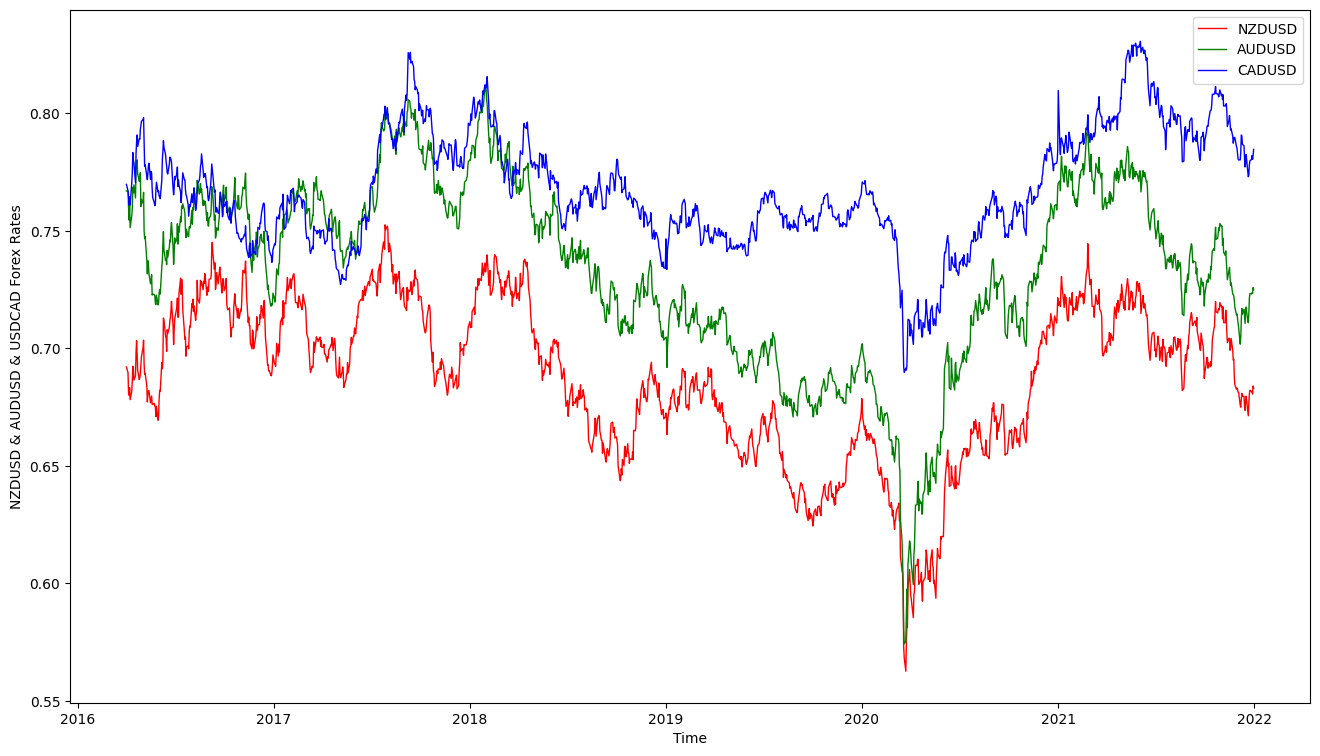

In [24]:
plt.plot(forex.NZDUSD, color='r', linewidth=1, label='NZDUSD')
plt.plot(forex.AUDUSD, color='g', linewidth=1, label='AUDUSD')
plt.plot(1/forex.USDCAD, color='b', linewidth=1, label='CADUSD')
plt.xlabel('Time')
plt.ylabel("NZDUSD & AUDUSD & USDCAD Forex Rates")
plt.legend()
plt.show()

In [25]:
cadusd_adf = ADF(1/forex.USDCAD, trend='n', method='bic')
print('Augmented Dickey Fuller test statistics and p-values', cadusd_adf)

Augmented Dickey Fuller test statistics and p-values    Augmented Dickey-Fuller Results   
Test Statistic                  0.023
P-value                         0.692
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Has a unit root. Let's look at the differentiated process

In [26]:
cadusd_diff_adf = ADF((1/forex.USDCAD).diff().dropna(), trend='n', method='bic')
print('ADF test statistics and p-values of Differentiated CADUSD', cadusd_diff_adf)

ADF test statistics and p-values of Differentiated CADUSD    Augmented Dickey-Fuller Results   
Test Statistic                -38.301
P-value                         0.000
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


***Therefore, CADUSD is I(1)***

In [29]:
vecm_data = pd.concat([forex.AUDUSD, forex.NZDUSD, 1/forex.USDCAD.rename('CADUSD')], axis=1)

model=VAR(vecm_data)
x = model.select_order(maxlags=7, trend='c')
x.summary()


/opt/anaconda3/envs/test_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-23.49,-23.48,6.278e-11,-23.49
1,-34.83*,-34.79*,7.474e-16*,-34.81*
2,-34.83,-34.75,7.490e-16,-34.80
3,-34.83,-34.72,7.491e-16,-34.79
4,-34.82,-34.68,7.538e-16,-34.77
5,-34.81,-34.64,7.591e-16,-34.75
6,-34.81,-34.60,7.644e-16,-34.73
7,-34.80,-34.56,7.704e-16,-34.71


In [31]:
jtest = coint_johansen(vecm_data, det_order=0, k_ar_diff=1)

print(f'Eigenvalue of VECM coef matrix: {jtest.eig}\n')

pd.DataFrame(
    {
        'test_statistic' : jtest.trace_stat,
        'Critical Values 90%' : jtest.trace_stat_crit_vals[:,0],
        'Critical Values 95%' : jtest.trace_stat_crit_vals[:,1],
        'Critical Values 99%' : jtest.trace_stat_crit_vals[:,2]
    },
    index=['rank  =0', 'rank ≤ 1', 'rank ≤ 2']
)

Eigenvalue of VECM coef matrix: [0.01205939 0.00675233 0.00307245]



,test_statistic,Critical Values 90%,Critical Values 95%,Critical Values 99%
rank =0,32.889720,27.0669,29.7961,35.4628
rank ≤ 1,14.739214,13.4294,15.4943,19.9349
rank ≤ 2,4.603465,2.7055,3.8415,6.6349


In [33]:
vecm_model = VECM(endog = vecm_data, k_ar_diff=1, deterministic='ci').fit()
print(vecm_model.summary())

/opt/anaconda3/envs/test_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Det. terms outside the coint. relation & lagged endog. parameters for equation AUDUSD
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.AUDUSD      0.0084      0.048      0.175      0.861      -0.086       0.103
L1.NZDUSD     -0.0666      0.045     -1.477      0.140      -0.155       0.022
L1.CADUSD      0.0878      0.040      2.189      0.029       0.009       0.166
Det. terms outside the coint. relation & lagged endog. parameters for equation NZDUSD
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.AUDUSD      0.0317      0.047      0.674      0.501      -0.061       0.124
L1.NZDUSD     -0.0647      0.044     -1.464      0.143      -0.151       0.022
L1.CADUSD      0.0779      0.039      1.985      0.047       0.001       0.155
Det. terms outside the coint. relation

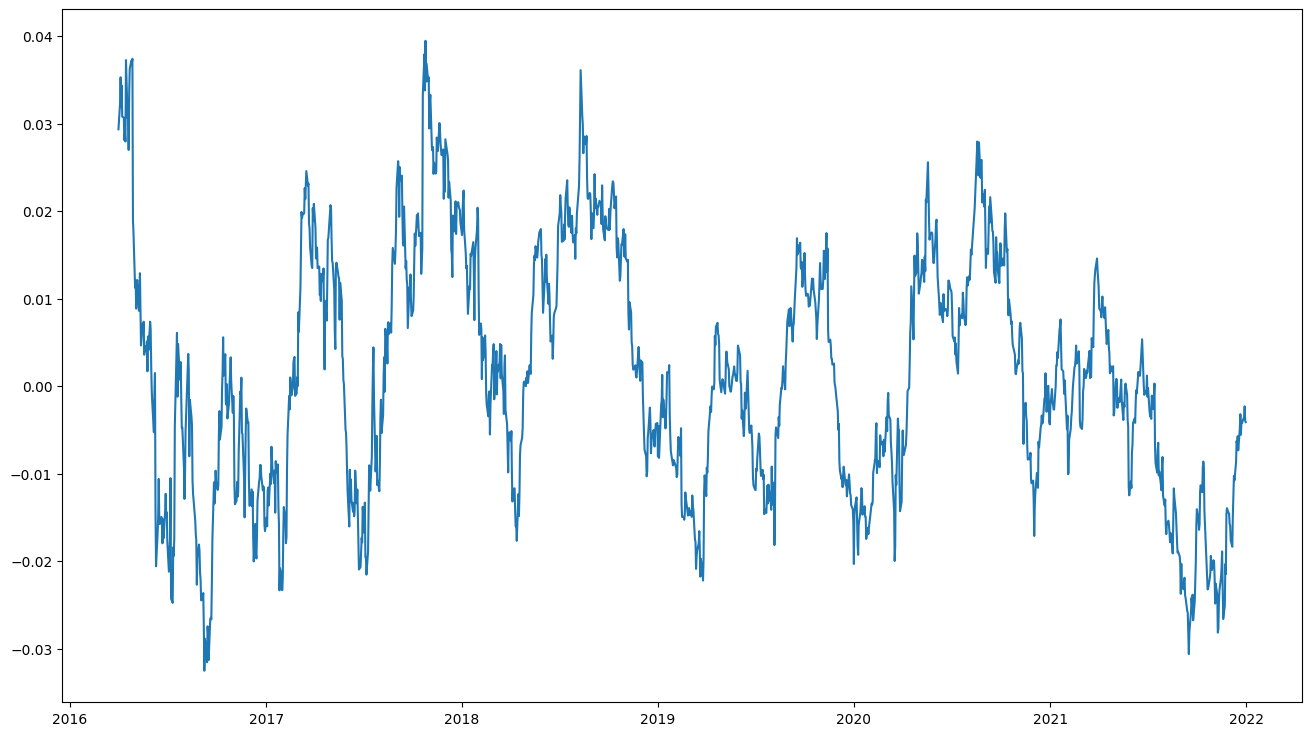

In [35]:
S= (
    vecm_model.const_coint[0][0]
    +vecm_model.beta[0][0]*vecm_data.AUDUSD
    +vecm_model.beta[1][0]*vecm_data.NZDUSD
    +vecm_model.beta[2][0]*vecm_data.CADUSD
)
plt.plot(S)
plt.show()

In [39]:
#ADF Test for S
adf_s = ADF(S, method='bic', trend='n')
print(f'ADF test result for linear combination : {adf_s}')

ADF test result for linear combination :    Augmented Dickey-Fuller Results   
Test Statistic                 -4.198
P-value                         0.000
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
